In [1]:
language_mapping = {
    "TGLANG_LANGUAGE_OTHER": "full-dataset-other",
    "TGLANG_LANGUAGE_C": "C",
    "TGLANG_LANGUAGE_CPLUSPLUS": "C++",
    "TGLANG_LANGUAGE_CSHARP": "C#",
    "TGLANG_LANGUAGE_CSS": "CSS",
    "TGLANG_LANGUAGE_DART": "Dart",
    "TGLANG_LANGUAGE_DOCKER": "Docker",
    "TGLANG_LANGUAGE_FUNC": "Func",
    "TGLANG_LANGUAGE_GO": "Go",
    "TGLANG_LANGUAGE_HTML": "HTML",
    "TGLANG_LANGUAGE_JAVA": "Java",
    "TGLANG_LANGUAGE_JAVASCRIPT": "JavaScript",
    "TGLANG_LANGUAGE_JSON": "JSON",
    "TGLANG_LANGUAGE_KOTLIN": "Kotlin",
    "TGLANG_LANGUAGE_LUA": "Lua",
    "TGLANG_LANGUAGE_NGINX": "Nginx",
    "TGLANG_LANGUAGE_OBJECTIVE_C": "Objective-C",
    "TGLANG_LANGUAGE_PHP": "PHP",
    "TGLANG_LANGUAGE_POWERSHELL": "PowerShell",
    "TGLANG_LANGUAGE_PYTHON": "Python",
    "TGLANG_LANGUAGE_RUBY": "Ruby",
    "TGLANG_LANGUAGE_RUST": "Rust",
    "TGLANG_LANGUAGE_SHELL": "Shell",
    "TGLANG_LANGUAGE_SOLIDITY": "Solidity",
    "TGLANG_LANGUAGE_SQL": "SQL",
    "TGLANG_LANGUAGE_SWIFT": "Swift",
    "TGLANG_LANGUAGE_TL": "TL",
    "TGLANG_LANGUAGE_TYPESCRIPT": "TypeScript",
    "TGLANG_LANGUAGE_XML": "XML",
}

languages = list(language_mapping.values())
num_languages = len(languages)
print(num_languages)


29


In [6]:
!mkdir ml2023-d1-dataset
!tar -xf ml2023-d1-dataset.tar -C ml2023-d1-dataset

!mkdir ml2023-r1-dataset
!tar -xf ml2023-r1-dataset.tar -C ml2023-r1-dataset

Dataset analyze

In [7]:
import os
import fnmatch

folder_r = "ml2023-r1-dataset"
folder = "ml2023-d1-dataset"

# Function to count files matching a pattern in a directory
def count_files(directory, pattern):
    count = 0
    for root, _, files in os.walk(directory):
        for filename in files:
            if fnmatch.fnmatch(filename, pattern):
                count += 1
    return count

# Function to get a list of file names in a directory (recursively)
def get_file_names(directory):
    file_names = []
    for root, _, files in os.walk(directory):
        for filename in files:
            file_names.append(filename)
    return file_names

count_code = count_files(folder, "*CODE*")
count_other = count_files(folder, "*OTHER*")
count_txt = count_files(folder, "*.txt")

count_code_r = count_files(folder_r, "*CODE*")
count_other_r = count_files(folder_r, "*OTHER*")
count_txt_r = count_files(folder_r, "*.txt")

file_names_in_folder = get_file_names(folder)
file_names_in_folder_r = get_file_names(folder_r)

# Calculate unique files in both directories
unique_files_in_folder = set(file_names_in_folder) - set(file_names_in_folder_r)
unique_files_in_folder_r = set(file_names_in_folder_r) - set(file_names_in_folder)

print(f"Number of files with 'CODE' in the name in '{folder}': {count_code}")
print(f"Number of files with 'OTHER' in the name in '{folder}': {count_other}")
print(f"Total number of .txt files in '{folder}': {count_txt}")

print(f"Number of files with 'CODE' in the name in '{folder_r}': {count_code_r}")
print(f"Number of files with 'OTHER' in the name in '{folder_r}': {count_other_r}")
print(f"Total number of .txt files in '{folder_r}': {count_txt_r}")

print(f"Number of unique files in '{folder}' (not existed in '{folder_r}' recursively): {len(unique_files_in_folder)}")
print(f"Number of unique files in '{folder_r}' (not existed in '{folder}' recursively): {len(unique_files_in_folder_r)}")


Number of files with 'CODE' in the name in 'ml2023-d1-dataset': 1975
Number of files with 'OTHER' in the name in 'ml2023-d1-dataset': 21313
Total number of .txt files in 'ml2023-d1-dataset': 23288
Number of files with 'CODE' in the name in 'ml2023-r1-dataset': 1969
Number of files with 'OTHER' in the name in 'ml2023-r1-dataset': 19769
Total number of .txt files in 'ml2023-r1-dataset': 21738
Number of unique files in 'ml2023-d1-dataset' (not existed in 'ml2023-r1-dataset' recursively): 21576
Number of unique files in 'ml2023-r1-dataset' (not existed in 'ml2023-d1-dataset' recursively): 20026


In [ ]:
Copy to new dataset folder

In [8]:
import os
import shutil
import fnmatch

# Source and destination directories
source_folder = "ml2023-d1-dataset"
source_folder_r = "ml2023-r1-dataset"
destination_folder_other = "./full-dataset/full-dataset-other"
destination_folder_code = "./full-dataset-code"

# Create destination directories if they don't exist
os.makedirs(destination_folder_other, exist_ok=True)
os.makedirs(destination_folder_code, exist_ok=True)

# Function to copy files matching a pattern from source to destination
def copy_files(source_directory, destination_directory, pattern):
    for root, _, files in os.walk(source_directory):
        for filename in files:
            if fnmatch.fnmatch(filename, pattern):
                source_path = os.path.join(root, filename)
                destination_path = os.path.join(destination_directory, filename)
                shutil.copy2(source_path, destination_path)

# Copy "OTHER" files
copy_files(source_folder, destination_folder_other, "*OTHER*")
copy_files(source_folder_r, destination_folder_other, "*OTHER*")

# Copy "CODE" files
copy_files(source_folder, destination_folder_code, "*CODE*")
copy_files(source_folder_r, destination_folder_code, "*CODE*")

print("Files copied successfully.")


Files copied successfully.


Create json with files list

In [9]:
import os
import json

# Define the base directory where you want to search for files
base_directory = "./full-dataset"

# Initialize a dictionary to store the mapping of language to files
language_files_mapping = {}

# Loop through each language in the language_mapping dictionary
for language_code, language_name in language_mapping.items():
	# Define the directory for the current language based on its name
	language_directory = os.path.join(base_directory, language_name)

	# Check if the directory exists
	if os.path.exists(language_directory):
		# Get a list of files in the directory
		file_list = os.listdir(language_directory)

		# Add the list of files to the mapping dictionary
		language_files_mapping[language_name] = file_list

# Define the output file path where you want to save the mapping
output_file_path = "./full-dataset/language_files_mapping.json"

# Save the language to files mapping as a JSON file
with open(output_file_path, "w") as output_file:
	json.dump(language_files_mapping, output_file, indent=4)

# Print the total number of languages and the saved mapping
print("Total Number of Languages:", num_languages)
print("Language to Files Mapping saved to", output_file_path)

Total Number of Languages: 29
Language to Files Mapping saved to ./full-dataset/language_files_mapping.json


Analyze file

In [10]:
import json

# Define the path to the JSON file containing the mapping
input_file_path = "./full-dataset/language_files_mapping.json"

# Initialize an empty list to store language-count pairs
language_counts = []

# Load the mapping from the JSON file
with open(input_file_path, "r") as input_file:
    loaded_language_files_mapping = json.load(input_file)

# Calculate and store the counts of files for each language
for language, file_list in loaded_language_files_mapping.items():
    language_counts.append((language, len(file_list)))

# Sort the list of language-count pairs by count in descending order
language_counts.sort(key=lambda x: x[1], reverse=True)

# Print the sorted counts
for language, count in language_counts:
    print(f"Language: {language}, File Count: {count}")


Language: full-dataset-other, File Count: 39404


Split to tho dataset

In [11]:
import json
import random
import os

# Define the path to the JSON file containing the mapping
input_file_path = "./full-dataset/language_files_mapping.json"

# Define the paths for the output train and validation JSON files
train_output_path = "./full-dataset/train_language_files_mapping.json"
validate_output_path = "./full-dataset/validate_language_files_mapping.json"

# Define the split ratio (90% train, 10% validate)
split_ratio = 0.9

# Initialize dictionaries for train and validate data
train_data = {}
validate_data = {}

# Load the mapping from the JSON file
with open(input_file_path, "r") as input_file:
	loaded_language_files_mapping = json.load(input_file)

# Split the data into train and validate for each language
for language, file_list in loaded_language_files_mapping.items():
	# Shuffle the file list randomly
	random.shuffle(file_list)
	
	if(language == "full-dataset-other"):
		# Calculate the split index based on the split_ratio
		split_index = int(len(file_list) * split_ratio)
	else:
		split_index = len(file_list)
	
	# Split the files into train and validate lists
	train_files = file_list[:split_index]
	validate_files = file_list[split_index:]
	
	# Add the language and file lists to the train and validate dictionaries
	train_data[language] = train_files
	validate_data[language] = validate_files

# Save the train and validate data as separate JSON files
with open(train_output_path, "w") as train_output_file:
	json.dump(train_data, train_output_file, indent=4)

with open(validate_output_path, "w") as validate_output_file:
	json.dump(validate_data, validate_output_file, indent=4)

# Print confirmation messages
print(f"Train data saved to {train_output_path}")
print(f"Validate data saved to {validate_output_path}")


Train data saved to ./full-dataset/train_language_files_mapping.json
Validate data saved to ./full-dataset/validate_language_files_mapping.json


load lists of files from jsons

In [12]:
import json

# Define the paths to the train and validate JSON files
train_output_path = "./full-dataset/train_language_files_mapping.json"
validate_output_path = "./full-dataset/validate_language_files_mapping.json"

# Initialize dictionaries for train and validate data
train_data = {}
validate_data = {}

# Load the train data from the JSON file
with open(train_output_path, "r") as train_input_file:
    train_data = json.load(train_input_file)

# Load the validate data from the JSON file
with open(validate_output_path, "r") as validate_input_file:
    validate_data = json.load(validate_input_file)

# Now, train_data and validate_data contain the loaded data


In [13]:
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("gpt2")

Analyze dataset

In [14]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np

# Specify the directory containing the files
directory = "full-dataset/full-dataset-other"

# Get all file names in the directory
all_files = os.listdir(directory)

# Randomly select 10000 files (or the maximum available if less than 10000)
selected_files = random.sample(all_files, min(10000, len(all_files)))

# Initialize list for token counts
token_counts = []

# Process each file
for file in selected_files:
    try:
        with open(os.path.join(directory, file), 'r', encoding='utf-8') as f:
            content = f.read()
            tokens = tokenizer.encode(content)
            token_counts.append(len(tokens))
    except Exception as e:
        print(f"Error processing file {file}: {e}")


Token indices sequence length is longer than the specified maximum sequence length for this model (2421 > 1024). Running this sequence through the model will result in indexing errors


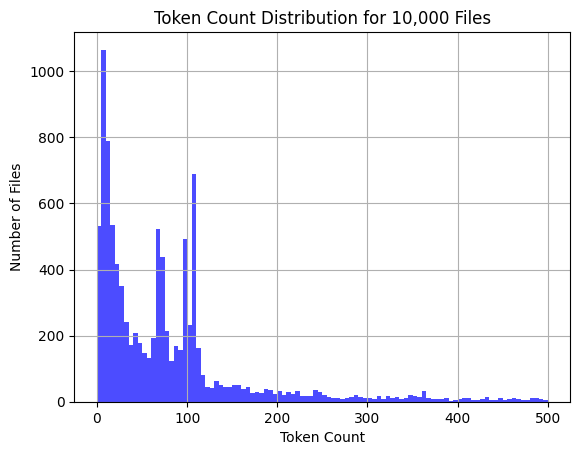

In [15]:
# Plotting the histogram
plt.hist(token_counts, bins=100, color='blue', alpha=0.7, range=(0, 500))
plt.title("Token Count Distribution for 10,000 Files")
plt.xlabel("Token Count")
plt.ylabel("Number of Files")
plt.grid(True)
plt.show()

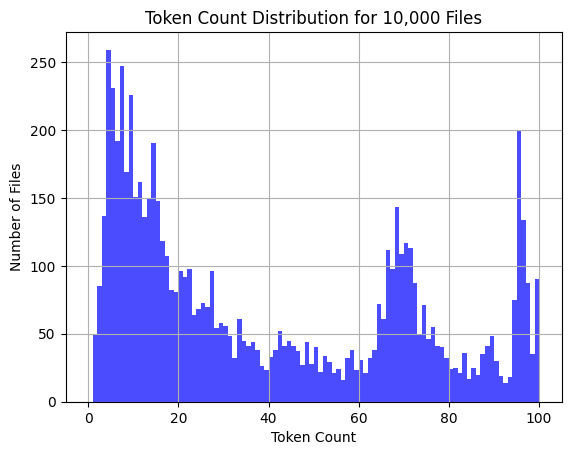

In [16]:
# Plotting the histogram
plt.hist(token_counts, bins=100, color='blue', alpha=0.7, range=(0, 100))
plt.title("Token Count Distribution for 10,000 Files")
plt.xlabel("Token Count")
plt.ylabel("Number of Files")
plt.grid(True)
plt.show()

In [17]:
SPECIAL_TOKENS = {'pad_token':'<pad>'}
tokenizer.add_special_tokens(SPECIAL_TOKENS)

1

In [18]:
import os
import random
import torch
from transformers import AutoTokenizer
import numpy as np
import pickle
import concurrent.futures

datafolder = "./full-dataset"
minimum_length = 10
text_len = 256
num_threads = 1

def to_categorical(y, num_classes):
	""" 1-hot encodes a tensor """
	return np.eye(num_classes, dtype='uint8')[y]


def read_file_with_retry(file_path, max_length=None):
	try:
		with open(file_path, "r", encoding="utf-8") as file:
			content = file.read(max_length)
		return content
	except UnicodeDecodeError:
		try:
			with open(file_path, "r", encoding="utf-8-sig") as file:
				content = file.read(max_length)
			return content
		except UnicodeDecodeError:
			try:
				with open(file_path, "r", encoding="iso-8859-1") as file:
					content = file.read(max_length)
				return content
			except UnicodeDecodeError:
				print(f"Error reading file '{file_path}'. Trying another file...")
				return None

def tokenize_and_save_fragments(data, tokenizer, output_folder, num_batches, text_len, num_threads):
	os.makedirs(output_folder, exist_ok=True)

	last_index = 0
	while os.path.exists(os.path.join(batches_folder, f"batch_{last_index + 1}.pkl")):
		last_index += 1

	print(last_index, num_batches)
	# def tokenize_and_save_batch(batch_index):
	for batch_index in range(last_index, num_batches):
		contents = []
		batch_data = []  # List to hold the batch data
		batch_label_indexes = []  # List to hold the index (key of the value)
		batch_labels_categorical = []  # List to hold one-hot encoded labels
		# for i, (language, file_list) in enumerate(data.items()):
		for i, (language, folder_name) in enumerate(language_mapping.items()):
			if not folder_name in data or len(data[folder_name]) == 0:
				contents.append("")
				continue
			file_list = data[folder_name]
			file_name = file_list[batch_index % len(file_list)]
			
			# Read the content of the file
			content = read_file_with_retry(os.path.join(datafolder, folder_name, file_name), 10000)
			
			# print(content)
			
			# Tokenize the content
			contents.append(content)
			
		tokens = tokenizer(contents, return_tensors="pt", padding=True,  max_length=3000)

		# for i, (language, file_list) in enumerate(data.items()):
		for i, (language, folder_name) in enumerate(language_mapping.items()):
			if not folder_name in data or len(data[folder_name]) == 0:
				batch_data.append(torch.tensor([[0 for i in range(text_len)]]))  # Add content to the batch
				batch_labels_categorical.append(torch.tensor([0 for i in range(29)]))
				batch_label_indexes.append(-1)  # Add the index (key) to the batch
				continue
			file_list = data[folder_name]
			token_ids = tokens["input_ids"][i]

			# Calculate text_len based on the first pad position
			first_pad_position = (token_ids == tokenizer.pad_token_id).nonzero()
			if len(first_pad_position) > 0:
				token_ids_len = first_pad_position[0, 0].item()
			else:
				token_ids_len = len(token_ids)
			
			file_name = file_list[batch_index % len(file_list)]
			# print(f"file:{folder_name}/{file_name}")
			# print(f"len:{token_ids_len}")
			
			min_start_idx = 0
			max_start_idx = max(0, token_ids_len - minimum_length)
			start_idx = np.random.randint(min_start_idx, max_start_idx) if max_start_idx > 0 else 0
			# print(f"start_idx: {min_start_idx} < {start_idx} < {max_start_idx}")

			min_end_idx = min(token_ids_len, start_idx + minimum_length)
			max_end_idx = min(token_ids_len, start_idx + text_len)
			end_idx = token_ids_len if min_end_idx == max_end_idx else np.random.randint(min_end_idx, max_end_idx)
			result_text_len = end_idx - start_idx
			# print(f"end_idx: {min_end_idx} < {end_idx} < {max_end_idx} (len: {result_text_len})")



			truncated_token_ids = token_ids[start_idx:end_idx]
			# print(f"truncated_token_ids {truncated_token_ids.shape}")
			padding_length = text_len - len(truncated_token_ids)
			if padding_length > 0:
				padded_token_ids = torch.cat([truncated_token_ids, torch.full((padding_length,), fill_value=tokenizer.pad_token_id, dtype=torch.long)], dim=0)
			else:
				padded_token_ids = truncated_token_ids
			# print(f"padded_token_ids {padded_token_ids.shape}")

			# detokenized_text = tokenizer.decode(padded_token_ids)
			# print(detokenized_text)
		
			label_categorical = to_categorical(i, num_languages)

			batch_data.append(padded_token_ids.unsqueeze(0))  # Add content to the batch
			batch_labels_categorical.append(label_categorical)
			batch_label_indexes.append(i)  # Add the index (key) to the batch


		batch_data = torch.cat(batch_data, dim=0)
		batch_labels_categorical = torch.tensor(batch_labels_categorical, dtype=torch.float32)
		batch_label_indexes = torch.tensor(batch_label_indexes)
		
		batch_filename = os.path.join(batches_folder, f"batch_{batch_index+1}.pkl")

		# print(f"Batch {batch_index+1} batch_data Shape: {batch_data.shape}")
		# print(f"Batch {batch_index+1} batch_label Shape: {batch_labels_categorical.shape}")
		# print(f"Batch {batch_index+1} batch_label_indexes Shape: {batch_label_indexes.shape}")
		
		print(f"save {batch_filename} (len: {end_idx - start_idx})")
		with open(batch_filename, "wb") as f:
			pickle.dump((batch_data, batch_labels_categorical, batch_label_indexes), f)

	# with concurrent.futures.ThreadPoolExecutor(max_workers=num_threads) as executor:
	# 	futures = []
	# 	for batch_index in range(last_index, num_batches):
	# 		futures.append(executor.submit(tokenize_and_save_batch, batch_index))

	# 	for future in concurrent.futures.as_completed(futures):
	# 		future.result()

# Usage example:
# train_data or validate_data should be loaded and structured properly
# tokenize_and_save_fragments(data_to_write, tokenizer, batches_folder, num_batches, text_len, num_threads)

Saving train batches

In [20]:
batches_folder = "./dataset_v4_train2"
num_batches = 50000
tokenize_and_save_fragments(validate_data, tokenizer, batches_folder, num_batches, text_len, num_threads)

0 50000
save ./dataset_v4_train2/batch_1.pkl (len: 14)
save ./dataset_v4_train2/batch_2.pkl (len: 78)
save ./dataset_v4_train2/batch_3.pkl (len: 23)
save ./dataset_v4_train2/batch_4.pkl (len: 10)
save ./dataset_v4_train2/batch_5.pkl (len: 7)
save ./dataset_v4_train2/batch_6.pkl (len: 7)
save ./dataset_v4_train2/batch_7.pkl (len: 10)
save ./dataset_v4_train2/batch_8.pkl (len: 35)
save ./dataset_v4_train2/batch_9.pkl (len: 12)
save ./dataset_v4_train2/batch_10.pkl (len: 18)
save ./dataset_v4_train2/batch_11.pkl (len: 81)
save ./dataset_v4_train2/batch_12.pkl (len: 9)
save ./dataset_v4_train2/batch_13.pkl (len: 20)
save ./dataset_v4_train2/batch_14.pkl (len: 62)
save ./dataset_v4_train2/batch_15.pkl (len: 15)
save ./dataset_v4_train2/batch_16.pkl (len: 26)
save ./dataset_v4_train2/batch_17.pkl (len: 35)
save ./dataset_v4_train2/batch_18.pkl (len: 16)
save ./dataset_v4_train2/batch_19.pkl (len: 4)
save ./dataset_v4_train2/batch_20.pkl (len: 16)
save ./dataset_v4_train2/batch_21.pkl (len: 7

/Users/vadimmakarov/Documents/Work_home/cp-gpt/transformers/src/transformers/tokenization_utils_base.py:2632: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(
/var/folders/9z/q_wbkn9n3rx2yphg29mvstph0000gn/T/ipykernel_45595/58331518.py:124: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:264.)
  batch_labels_categorical = torch.tensor(batch_labels_categorical, dtype=torch.float32)


save ./dataset_v4_train2/batch_39.pkl (len: 26)
save ./dataset_v4_train2/batch_40.pkl (len: 42)
save ./dataset_v4_train2/batch_41.pkl (len: 17)
save ./dataset_v4_train2/batch_42.pkl (len: 35)
save ./dataset_v4_train2/batch_43.pkl (len: 10)
save ./dataset_v4_train2/batch_44.pkl (len: 3)
save ./dataset_v4_train2/batch_45.pkl (len: 8)
save ./dataset_v4_train2/batch_46.pkl (len: 27)
save ./dataset_v4_train2/batch_47.pkl (len: 43)
save ./dataset_v4_train2/batch_48.pkl (len: 11)
save ./dataset_v4_train2/batch_49.pkl (len: 10)
save ./dataset_v4_train2/batch_50.pkl (len: 6)
save ./dataset_v4_train2/batch_51.pkl (len: 28)
save ./dataset_v4_train2/batch_52.pkl (len: 29)
save ./dataset_v4_train2/batch_53.pkl (len: 10)
save ./dataset_v4_train2/batch_54.pkl (len: 42)
save ./dataset_v4_train2/batch_55.pkl (len: 39)
save ./dataset_v4_train2/batch_56.pkl (len: 13)
save ./dataset_v4_train2/batch_57.pkl (len: 28)
save ./dataset_v4_train2/batch_58.pkl (len: 23)
save ./dataset_v4_train2/batch_59.pkl (len:

KeyboardInterrupt: 

Saving validate batches

In [21]:
batches_folder = "./dataset_v4_validate2"
num_batches = 5000
tokenize_and_save_fragments(validate_data, tokenizer, batches_folder, num_batches, text_len, num_threads)

0 5000
save ./dataset_v4_validate2/batch_1.pkl (len: 57)
save ./dataset_v4_validate2/batch_2.pkl (len: 26)
save ./dataset_v4_validate2/batch_3.pkl (len: 16)
save ./dataset_v4_validate2/batch_4.pkl (len: 19)
save ./dataset_v4_validate2/batch_5.pkl (len: 7)
save ./dataset_v4_validate2/batch_6.pkl (len: 7)
save ./dataset_v4_validate2/batch_7.pkl (len: 10)
save ./dataset_v4_validate2/batch_8.pkl (len: 30)
save ./dataset_v4_validate2/batch_9.pkl (len: 16)
save ./dataset_v4_validate2/batch_10.pkl (len: 22)
save ./dataset_v4_validate2/batch_11.pkl (len: 87)
save ./dataset_v4_validate2/batch_12.pkl (len: 9)
save ./dataset_v4_validate2/batch_13.pkl (len: 32)
save ./dataset_v4_validate2/batch_14.pkl (len: 13)
save ./dataset_v4_validate2/batch_15.pkl (len: 24)
save ./dataset_v4_validate2/batch_16.pkl (len: 15)
save ./dataset_v4_validate2/batch_17.pkl (len: 20)
save ./dataset_v4_validate2/batch_18.pkl (len: 20)
save ./dataset_v4_validate2/batch_19.pkl (len: 4)
save ./dataset_v4_validate2/batch_20.

KeyboardInterrupt: 